# Assignment 3 (e )
## (scipy.linalg)

# Introduction

SciPy is built using the optimized ATLAS LAPACK and BLAS libraries and therefore has a very fast linear algebra capabilities. All of these linear algebra routines expect an object that can be converted into a 2-dimensional array. The output of these routines is also a two-dimensional array. 

# scipy.linalg Versus numpy.linalg

scipy.linalg contains all the functions in numpy.linalg. plus some other more advanced ones not contained in numpy.linalg
Another advantage of using scipy.linalg over numpy.linalg is that it is always compiled with BLAS/LAPACK support, while for numpy this is optional. Therefore, the scipy version is faster depending on how numpy was installed.


# Basic routines
## Finding Inverse
The inverse of a matrix A is the matrix B such that AB=I where I is the identity matrix consisting of ones down the main diagonal. Usually B is denoted B=A−1 . In SciPy, the matrix inverse of the Numpy array, A, is obtained using linalg.inv (A) , or using A.I if A is a Matrix. The following example illustatrtes this

In [14]:
>>> import numpy as np
>>> from scipy import linalg
>>> A = np.array([[42,566,8],[22,65,1],[57,39,88]])
>>> linalg.inv(A)
>>> A.dot(linalg.inv(A)) #double check


array([[  1.00000000e+00,  -1.66533454e-16,   1.24900090e-16],
       [  6.93889390e-18,   1.00000000e+00,   1.07552856e-16],
       [  1.11022302e-16,  -4.44089210e-16,   1.00000000e+00]])

## Solving linear system
Solving linear systems of equations is straightforward using the scipy command linalg.solve. This command expects an input matrix and a right-hand-side vector. The solution vector is then computed. An option for entering a symmetric matrix is offered which can speed up the processing when applicable. As an example, suppose it is desired to solve the following simultaneous equations:
x+3y+5z=102x+5y+z=82x+3y+8z=3


In [15]:
>>> import numpy as np
>>> from scipy import linalg
>>> A = np.array([[1, 2], [3, 4]])
>>> b = np.array([[5], [6]])
>>> linalg.inv(A).dot(b)  # slow
>>> A.dot(linalg.inv(A).dot(b)) - b  # check
>>> np.linalg.solve(A, b)  # fast
>>> A.dot(np.linalg.solve(A, b)) - b  # check


array([[ 0.],
       [ 0.]])

## Finding Determinant
The determinant of a square matrix A is often denoted |A| and is a quantity often used in linear algebra. Suppose aij are the elements of the matrix A and let Mij=|Aij| be the determinant of the matrix left by removing the ith row and jth column from A . Then for any row i,
|A|=∑j(−1)i+jaijMij.
This is a recursive way to define the determinant where the base case is defined by accepting that the determinant of a 1×1 matrix is the only matrix element. In SciPy the determinant can be calculated with linalg.det . The following example illustatrtes this


In [16]:
>>> import numpy as np
>>> from scipy import linalg
>>> A = np.array([[4,2],[5,4]])
>>> linalg.det(A)


6.0

## Computing norms

Matrix and vector norms can also be computed with SciPy. A wide range of norm definitions are available using different parameters to the order argument of linalg.norm . This function takes a rank-1 (vectors) or a rank-2 (matrices) array and an optional order argument (default is 2). Based on these inputs a vector or matrix norm of the requested order is computed.

For vector x , the order parameter can be any real number including inf or -inf. The computed norm is
‖x‖={max|xi|ord=infmin|xi|ord=−inf(∑i|xi|ord)1/ord|ord|<∞.

For matrix A the only valid values for norm are ±2,±1, ± inf, and ‘fro’ (or ‘f’) Thus,
‖A‖={maxi∑j|aij|ord=infmini∑j|aij|ord=−infmaxj∑i|aij|ord=1minj∑i|aij|ord=−1maxσiord=2minσiord=−2√trace(AHA)ord='fro'
where σi are the singular values of A . The following example illustatrtes this


In [17]:
>>> import numpy as np
>>> from scipy import linalg
>>> A=np.array([[1,2],[3,4]])
>>> linalg.norm(A)
>>> linalg.norm(A,'fro') # frobenius norm is the default
>>> linalg.norm(A,1) # L1 norm (max column sum)
>>> linalg.norm(A,-1)
>>> linalg.norm(A,np.inf) # L inf norm (max row sum)


7.0

# Solving linear least-squares problems and pseudo-inverses
Linear least-squares problems occur in many branches of applied mathematics. In this problem a set of linear scaling coefficients is sought that allow a model to fit data. In particular it is assumed that data yi is related to data xi through a set of coefficients cj and model functions fj(xi) via the model
yi=∑jcjfj(xi)+ϵi
where ϵi represents uncertainty in the data. The strategy of least squares is to pick the coefficients cj to minimize
J(c)=∑i|yi−∑jcjfj(xi)|2.
Theoretically, a global minimum will occur when
∂J∂c∗n=0=∑i(yi−∑jcjfj(xi))(−f∗n(xi))
or
∑jcj∑ifj(xi)f∗n(xi)=∑iyif∗n(xi)AHAc=AHy
where
{A}ij=fj(xi).
When AHA is invertible, then
c=(AHA)−1AHy=A†y
where A† is called the pseudo-inverse of A. Notice that using this definition of A the model can be written
y=Ac+ϵ.
The command linalg.lstsq will solve the linear least squares problem for c given A and y . In addition linalg.pinv or linalg.pinv2 (uses a different method based on singular value decomposition) will find A† given A.
The following example and figure demonstrate the use of linalg.lstsq and linalg.pinv for solving a data-fitting problem. The data shown below were generated using the model:
yi=c1e−xi+c2xi
where xi=0.1i for i=1…10 , c1=5 , and c2=4. Noise is added to yi and the coefficients c1 and c2 are estimated using linear least squares.


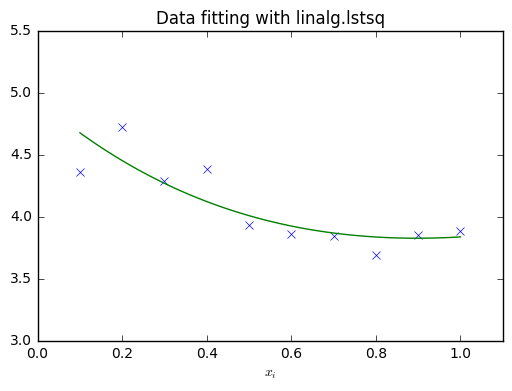

In [19]:
>>> %matplotlib inline
>>> import numpy as np
>>> from scipy import linalg
>>> import matplotlib.pyplot as plt
>>>
>>> c1, c2 = 5.0, 2.0
>>> i = np.r_[1:11]
>>> xi = 0.1*i
>>> yi = c1*np.exp(-xi) + c2*xi
>>> zi = yi + 0.05 * np.max(yi) * np.random.randn(len(yi))
>>>
>>> A = np.c_[np.exp(-xi)[:, np.newaxis], xi[:, np.newaxis]]
>>> c, resid, rank, sigma = linalg.lstsq(A, zi)
>>>
>>> xi2 = np.r_[0.1:1.0:100j]
>>> yi2 = c[0]*np.exp(-xi2) + c[1]*xi2
>>>
>>> plt.plot(xi,zi,'x',xi2,yi2)
>>> plt.axis([0,1.1,3.0,5.5])
>>> plt.xlabel('$x_i$')
>>> plt.title('Data fitting with linalg.lstsq')
>>> plt.show()


## Decompositions
In many applications it is useful to decompose a matrix using other representations. There are several decompositions supported by SciPy.
## Eigenvalues and eigenvectors
The eigenvalue-eigenvector problem is one of the most commonly employed linear algebra operations. In one popular form, the eigenvalue-eigenvector problem is to find for some square matrix A scalars λ and corresponding vectors v such that
Av=λv.
For an N×N matrix, there are N (not necessarily distinct) eigenvalues — roots of the (characteristic) polynomial
|A−λI|=0.
The eigenvectors, v , are also sometimes called right eigenvectors to distinguish them from another set of left eigenvectors that satisfy
vHLA=λvHL
or
AHvL=λ∗vL.
With it’s default optional arguments, the command linalg.eig returns λ and v. However, it can also return vL and just λ by itself ( linalg.eigvals returns just λ as well).
In addition, linalg.eig can also solve the more general eigenvalue problem
Av=λBvAHvL=λ∗BHvL
for square matrices A and B. The standard eigenvalue problem is an example of the general eigenvalue problem for B=I. When a generalized eigenvalue problem can be solved, then it provides a decomposition of A as
A=BVΛV−1
where V is the collection of eigenvectors into columns and Λ is a diagonal matrix of eigenvalues.
By definition, eigenvectors are only defined up to a constant scale factor. In SciPy, the scaling factor for the eigenvectors is chosen so that ‖v‖2=∑iv2i=1


As an example, consider finding the eigenvalues and eigenvectors of the matrix
A=[152241362].
The characteristic polynomial is
|A−λI|=(1−λ)[(4−λ)(2−λ)−6]−5[2(2−λ)−3]+2[12−3(4−λ)]=−λ3+7λ2+8λ−3.
The roots of this polynomial are the eigenvalues of A :
λ1=7.9579λ2=−1.2577λ3=0.2997.
The eigenvectors corresponding to each eigenvalue can be found using the original equation. The eigenvectors associated with these eigenvalues can then be found.


In [26]:
>>> %prun
>>> import numpy as np
>>> from scipy import linalg
>>> A = np.array([[1, 2], [3, 4]])
>>> la, v = linalg.eig(A)
>>> l1, l2 = la
>>> print l1, l2   # eigenvalues
(-0.372281323269+0j) (5.37228132327+0j)
>>> print v[:, 0]   # first eigenvector
[-0.82456484  0.56576746]
>>> print v[:, 1]   # second eigenvector
[-0.41597356 -0.90937671]
>>> print np.sum(abs(v**2), axis=0)  # eigenvectors are unitary

>>> v1 = np.array(v[:, 0]).T
>>> print linalg.norm(A.dot(v1) - l1*v1)  # check the computation



SyntaxError: Missing parentheses in call to 'print' (<ipython-input-26-a24fc1d67812>, line 7)

## Matrix Functions
Consider the function f(x) with Taylor series expansion
f(x)=∞∑k=0f(k)(0)k!xk.
A matrix function can be defined using this Taylor series for the square matrix A as
f(A)=∞∑k=0f(k)(0)k!Ak.
While, this serves as a useful representation of a matrix function, it is rarely the best way to calculate a matrix function.


### Exponential and logarithm functions
The matrix exponential is one of the more common matrix functions. It can be defined for square matrices as
eA=∞∑k=01k!Ak.
The command linalg.expm3 uses this Taylor series definition to compute the matrix exponential. 
Due to poor convergence properties it is not often used.


### Trigonometric functions
The trigonometric functions sin , cos , and tan are implemented for matrices in linalg.sinm, linalg.cosm, and linalg.tanm respectively. The matrix sin and cosine can be defined using Euler’s identity as
sin(A)=ejA−e−jA2jcos(A)=ejA+e−jA2.
The tangent is
tan(x)=sin(x)cos(x)=[cos(x)]−1sin(x)
and so the matrix tangent is defined as
[cos(A)]−1sin(A).


### Arbitrary function
Finally, any arbitrary function that takes one complex number and returns a complex number can be called as a matrix function using the command linalg.funm. This command takes the matrix and an arbitrary Python function. It then implements an algorithm from Golub and Van Loan’s book “Matrix Computations” to compute function applied to the matrix using a Schur decomposition. Note that the function needs to accept complex numbers as input in order to work with this algorithm. For example the following code computes the zeroth-order Bessel function applied to a matrix.


In [30]:
>>> %prun
>>> from scipy import special, random, linalg
>>> np.random.seed(1234)
>>> A = random.rand(3, 3)
>>> B = linalg.funm(A, lambda x: special.jv(0, x))
>>> linalg.eigvals(A)
>>> special.jv(0, linalg.eigvals(A))
>>> linalg.eigvals(B)



array([ 0.37551908+0.j,  0.98975384+0.j,  0.96165739+0.j])

### Special matrices
SciPy and NumPy provide several functions for creating special matrices that are frequently used in engineering and science.
Type	Function	Description

(a)  block diagonal	scipy.linalg.block_diag   Create a block diagonal matrix from the provided arrays.
(b)  circulant	scipy.linalg.circulant Construct a circulant matrix.
(c)  companion	scipy.linalg.companion  Create a companion matrix.
(d)  Hadamard	scipy.linalg.hadamard   Construct a Hadamard matrix.
(e)  Hankel	scipy.linalg.hankel   Construct a Hankel matrix.
(f)  Hilbert	scipy.linalg.hilbert   Construct a Hilbert matrix.
(g)  Inverse Hilbert	scipy.linalg.invhilbert  Construct the inverse of a Hilbert matrix.
(h)   Leslie	scipy.linalg.leslie   Create a Leslie matrix.
(j)  Pascal	scipy.linalg.pascal   Create a Pascal matrix.
(k)  Toeplitz	scipy.linalg.toeplitz  Construct a Toeplitz matrix.
(i)  Van der Monde	numpy.vander   Generate a Van der Monde matrix.
